# Lesson (K-Means Clustering)


In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from scipy.stats import ortho_group
import matplotlib.pyplot as plt
%matplotlib inline

# plot parameters
colors = np.array(['blue','green','red','cyan','magenta','yellow','black'])
marker_size = 100
marker_alpha = 0.25

def GenCluster(n,mu,std,rot=True):
    d = len(mu)
    coords = np.random.normal(loc=mu,scale=std,size=(n,d))
    if rot == True:    
        Q = ortho_group.rvs(d)
        mu = np.array(mu)
        coords = np.matmul(coords-mu,Q)
        coords = coords + mu
    return coords

def GenerateClusters(num_points=[100,100,100],STD=[[1,1],[1,1],[1,1]],rot=True):
    num_points = np.array(num_points)
    STD = np.array(STD)
    (num_clusters,d) = STD.shape
    MU = np.random.uniform(low=-10,high=10,size=(num_clusters,d))
    N = num_points.sum()
    coords = np.zeros((N,d))
    labels = np.zeros(N,dtype='int')
    i0 = 0
    for k in np.arange(num_clusters): 
        n = num_points[k]
        mu = MU[k,:]
        std = STD[k,:]
        coords[i0:i0+n,:] = GenCluster(n,mu,std,rot=rot)
        labels[i0:i0+n]   = k
        i0 = i0 + n
    return (coords,labels)

### Generate Clusters

Text(0.5, 1.0, 'Original Clusters')

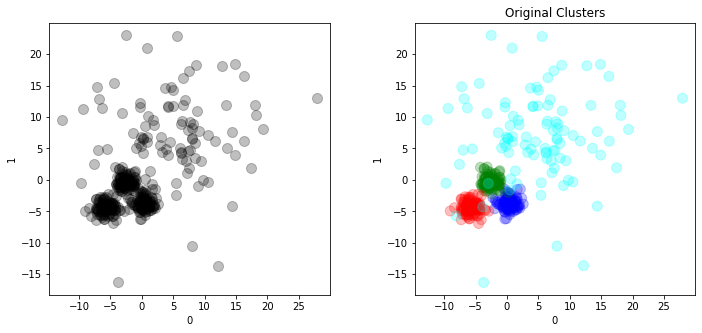

In [2]:
# cluster parameters
num_points = [100,100,100,100]
STD = [[1,1],[1,1],[1,1],[7,7]]
rot = True

(coords,labels) = GenerateClusters(num_points=num_points,STD=STD,rot=rot)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
fig,axes = plt.subplots(nrows=1,ncols=2,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')

### K-Means

Text(0.5, 1.0, 'KMeans Clusters')

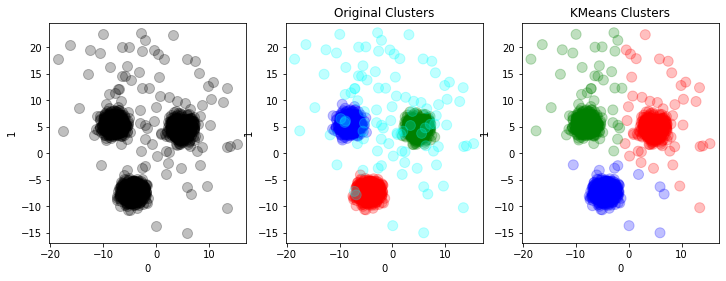

In [3]:
K = 3
num_points = [1000,1000,1000,100]
STD = [[1,1],[1,1],[1,1],[7,8]]
(coords,labels) = GenerateClusters(num_points=num_points,STD=STD)
df = pd.DataFrame(coords)
df['cluster'] = colors[labels]
labels_kmeans = KMeans(n_clusters=K).fit_predict(coords)
df['KMeans']  = colors[labels_kmeans]
fig,axes = plt.subplots(nrows=1,ncols=3,figsize=(12,5))
plot1 = df.plot.scatter(x=0,y=1,c='black',s=marker_size,alpha=marker_alpha,ax=axes[0])
plot1.set_aspect('equal')
plot2 = df.plot.scatter(x=0,y=1,c=df.cluster.values,s=marker_size,alpha=marker_alpha,ax=axes[1])
plot2.set_aspect('equal')
plot2.set_title('Original Clusters')
plot3 = df.plot.scatter(x=0,y=1,c=df.KMeans.values,s=marker_size,alpha=marker_alpha,ax=axes[2])
plot3.set_aspect('equal')
plot3.set_title('KMeans Clusters')